In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
from sklearn.cluster import KMeans

# Open the trainign data json
with open('/content/drive/My Drive/TrainReal.json', 'r') as f:
    data = json.load(f)

# Import the annotationd and image information
json_string = json.dumps(data['annotations'])
df = pd.read_json(json_string)

json_string = json.dumps(data['images'])
dfImages = pd.read_json(json_string)

In [ ]:
# Renaming column for merging dataframes
dfImages.rename(columns={"id": "image_id"}, inplace = True)
dfImages

,file_name,image_id,frame_id,prev_image_id,next_image_id,video_id,width,height
0,TrainReal/images/0000000010_0000000000/0000000...,1,1,-1,2,1,698,519
1,TrainReal/images/0000000010_0000000000/0000000...,2,2,1,3,1,698,519
2,TrainReal/images/0000000010_0000000000/0000000...,3,3,2,4,1,698,519
3,TrainReal/images/0000000010_0000000000/0000000...,4,4,3,5,1,698,519
4,TrainReal/images/0000000010_0000000000/0000000...,5,5,4,6,1,698,519
...,...,...,...,...,...,...,...,...
40656,TrainReal/images/0000000367_0000000000/0000000...,40657,5444,40656,40658,32,700,321
40657,TrainReal/images/0000000367_0000000000/0000000...,40658,5445,40657,40659,32,700,321
40658,TrainReal/images/0000000367_0000000000/0000000...,40659,5446,40658,40660,32,700,321
40659,TrainReal/images/0000000367_0000000000/0000000...,40660,5447,40659,40661,32,700,321


In [ ]:
# Converting bbox to split values
split_df = pd.DataFrame(df['bbox'].tolist(), columns=['x', 'y', 'w', 'h'])
df = pd.concat([df, split_df], axis=1)

df

,id,category_id,image_id,track_id,bbox,conf,x,y,w,h
0,1,1,2,1,"[497, 234, 16, 14]",1,497,234,16,14
1,2,1,2,2,"[510, 249, 15, 11]",1,510,249,15,11
2,3,1,3,1,"[497, 234, 16, 14]",1,497,234,16,14
3,4,1,3,2,"[510, 249, 15, 11]",1,510,249,15,11
4,5,1,4,1,"[499, 235, 16, 14]",1,499,235,16,14
...,...,...,...,...,...,...,...,...,...,...
87153,87154,1,40638,67,"[28, 304, 28, 34]",1,28,304,28,34
87154,87155,1,40639,67,"[28, 304, 28, 34]",1,28,304,28,34
87155,87156,1,40640,67,"[28, 304, 28, 34]",1,28,304,28,34
87156,87157,1,40641,67,"[28, 304, 28, 34]",1,28,304,28,34


In [ ]:
# Merging the dataframes
result = pd.merge(df, dfImages, on='image_id')
result

,id,category_id,image_id,track_id,bbox,conf,x,y,w,h,file_name,frame_id,prev_image_id,next_image_id,video_id,width,height
0,1,1,2,1,"[497, 234, 16, 14]",1,497,234,16,14,TrainReal/images/0000000010_0000000000/0000000...,2,1,3,1,698,519
1,2,1,2,2,"[510, 249, 15, 11]",1,510,249,15,11,TrainReal/images/0000000010_0000000000/0000000...,2,1,3,1,698,519
2,3,1,3,1,"[497, 234, 16, 14]",1,497,234,16,14,TrainReal/images/0000000010_0000000000/0000000...,3,2,4,1,698,519
3,4,1,3,2,"[510, 249, 15, 11]",1,510,249,15,11,TrainReal/images/0000000010_0000000000/0000000...,3,2,4,1,698,519
4,5,1,4,1,"[499, 235, 16, 14]",1,499,235,16,14,TrainReal/images/0000000010_0000000000/0000000...,4,3,5,1,698,519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87153,87154,1,40638,67,"[28, 304, 28, 34]",1,28,304,28,34,TrainReal/images/0000000367_0000000000/0000000...,5425,40637,40639,32,700,321
87154,87155,1,40639,67,"[28, 304, 28, 34]",1,28,304,28,34,TrainReal/images/0000000367_0000000000/0000000...,5426,40638,40640,32,700,321
87155,87156,1,40640,67,"[28, 304, 28, 34]",1,28,304,28,34,TrainReal/images/0000000367_0000000000/0000000...,5427,40639,40641,32,700,321
87156,87157,1,40641,67,"[28, 304, 28, 34]",1,28,304,28,34,TrainReal/images/0000000367_0000000000/0000000...,5428,40640,40642,32,700,321


In [ ]:
# Determining ratio for the image based on width mapping to 640
result['ratio'] = 640/result['width']
result['w_scaled'] = result['ratio'] * result['w']
result['h_scaled'] = result['ratio'] * result['h']
result

,id,category_id,image_id,track_id,bbox,conf,x,y,w,h,file_name,frame_id,prev_image_id,next_image_id,video_id,width,height,ratio,w_scaled,h_scaled
0,1,1,2,1,"[497, 234, 16, 14]",1,497,234,16,14,TrainReal/images/0000000010_0000000000/0000000...,2,1,3,1,698,519,0.916905,14.670487,12.836676
1,2,1,2,2,"[510, 249, 15, 11]",1,510,249,15,11,TrainReal/images/0000000010_0000000000/0000000...,2,1,3,1,698,519,0.916905,13.753582,10.085960
2,3,1,3,1,"[497, 234, 16, 14]",1,497,234,16,14,TrainReal/images/0000000010_0000000000/0000000...,3,2,4,1,698,519,0.916905,14.670487,12.836676
3,4,1,3,2,"[510, 249, 15, 11]",1,510,249,15,11,TrainReal/images/0000000010_0000000000/0000000...,3,2,4,1,698,519,0.916905,13.753582,10.085960
4,5,1,4,1,"[499, 235, 16, 14]",1,499,235,16,14,TrainReal/images/0000000010_0000000000/0000000...,4,3,5,1,698,519,0.916905,14.670487,12.836676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87153,87154,1,40638,67,"[28, 304, 28, 34]",1,28,304,28,34,TrainReal/images/0000000367_0000000000/0000000...,5425,40637,40639,32,700,321,0.914286,25.600000,31.085714
87154,87155,1,40639,67,"[28, 304, 28, 34]",1,28,304,28,34,TrainReal/images/0000000367_0000000000/0000000...,5426,40638,40640,32,700,321,0.914286,25.600000,31.085714
87155,87156,1,40640,67,"[28, 304, 28, 34]",1,28,304,28,34,TrainReal/images/0000000367_0000000000/0000000...,5427,40639,40641,32,700,321,0.914286,25.600000,31.085714
87156,87157,1,40641,67,"[28, 304, 28, 34]",1,28,304,28,34,TrainReal/images/0000000367_0000000000/0000000...,5428,40640,40642,32,700,321,0.914286,25.600000,31.085714


In [ ]:
# Checking if there are any images where height is greater than width
result.query('height > width')

,id,category_id,image_id,track_id,bbox,conf,x,y,w,h,file_name,frame_id,prev_image_id,next_image_id,video_id,width,height,ratio,w_scaled,h_scaled


Centroids
[[ 31.46729269  47.98845828]
 [ 15.82283796  21.10945966]
 [ 65.32346939 121.1877551 ]
 [ 76.08223048  62.24441073]
 [ 42.94989909  37.33196577]
 [ 80.24941277  92.48977151]
 [ 11.14262275  11.03641033]
 [ 53.04596053  83.30919591]
 [ 24.75459604  38.4256956 ]
 [ 31.52400932  30.43982685]
 [105.60357608  87.26600857]
 [ 51.94883142  60.17966164]]

Centroids Rounded
[[ 31.  48.]
 [ 16.  21.]
 [ 65. 121.]
 [ 76.  62.]
 [ 43.  37.]
 [ 80.  92.]
 [ 11.  11.]
 [ 53.  83.]
 [ 25.  38.]
 [ 32.  30.]
 [106.  87.]
 [ 52.  60.]]


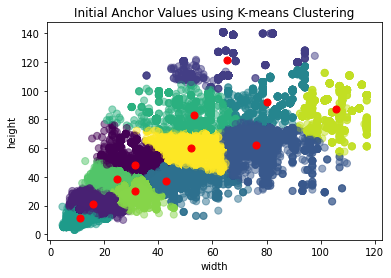

In [ ]:
# Determining the 12 centeroids for initial anchors
X = result[['w_scaled', 'h_scaled']]

K = KMeans(12, random_state=0)
kmeans = K.fit(X)
centroids = kmeans.cluster_centers_
print('Centroids')
print(centroids)
print()

np_centroids = np.array(centroids)
np_centroids_rounded = np.around(np_centroids, 0)
print('Centroids Rounded')
print(np_centroids_rounded)

plt.scatter(result['w_scaled'], result['h_scaled'], c= kmeans.labels_.astype(float), s=50, alpha=0.5, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.title("Initial Anchor Values using K-means Clustering")
plt.xlabel("width")
plt.ylabel("height")
plt.savefig('/content/drive/My Drive/ROB498/Anchor Centroids', dpi=300)
plt.show()